# Clasificación de hongos comestibles y venenosos utilizando árboles de decisión

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

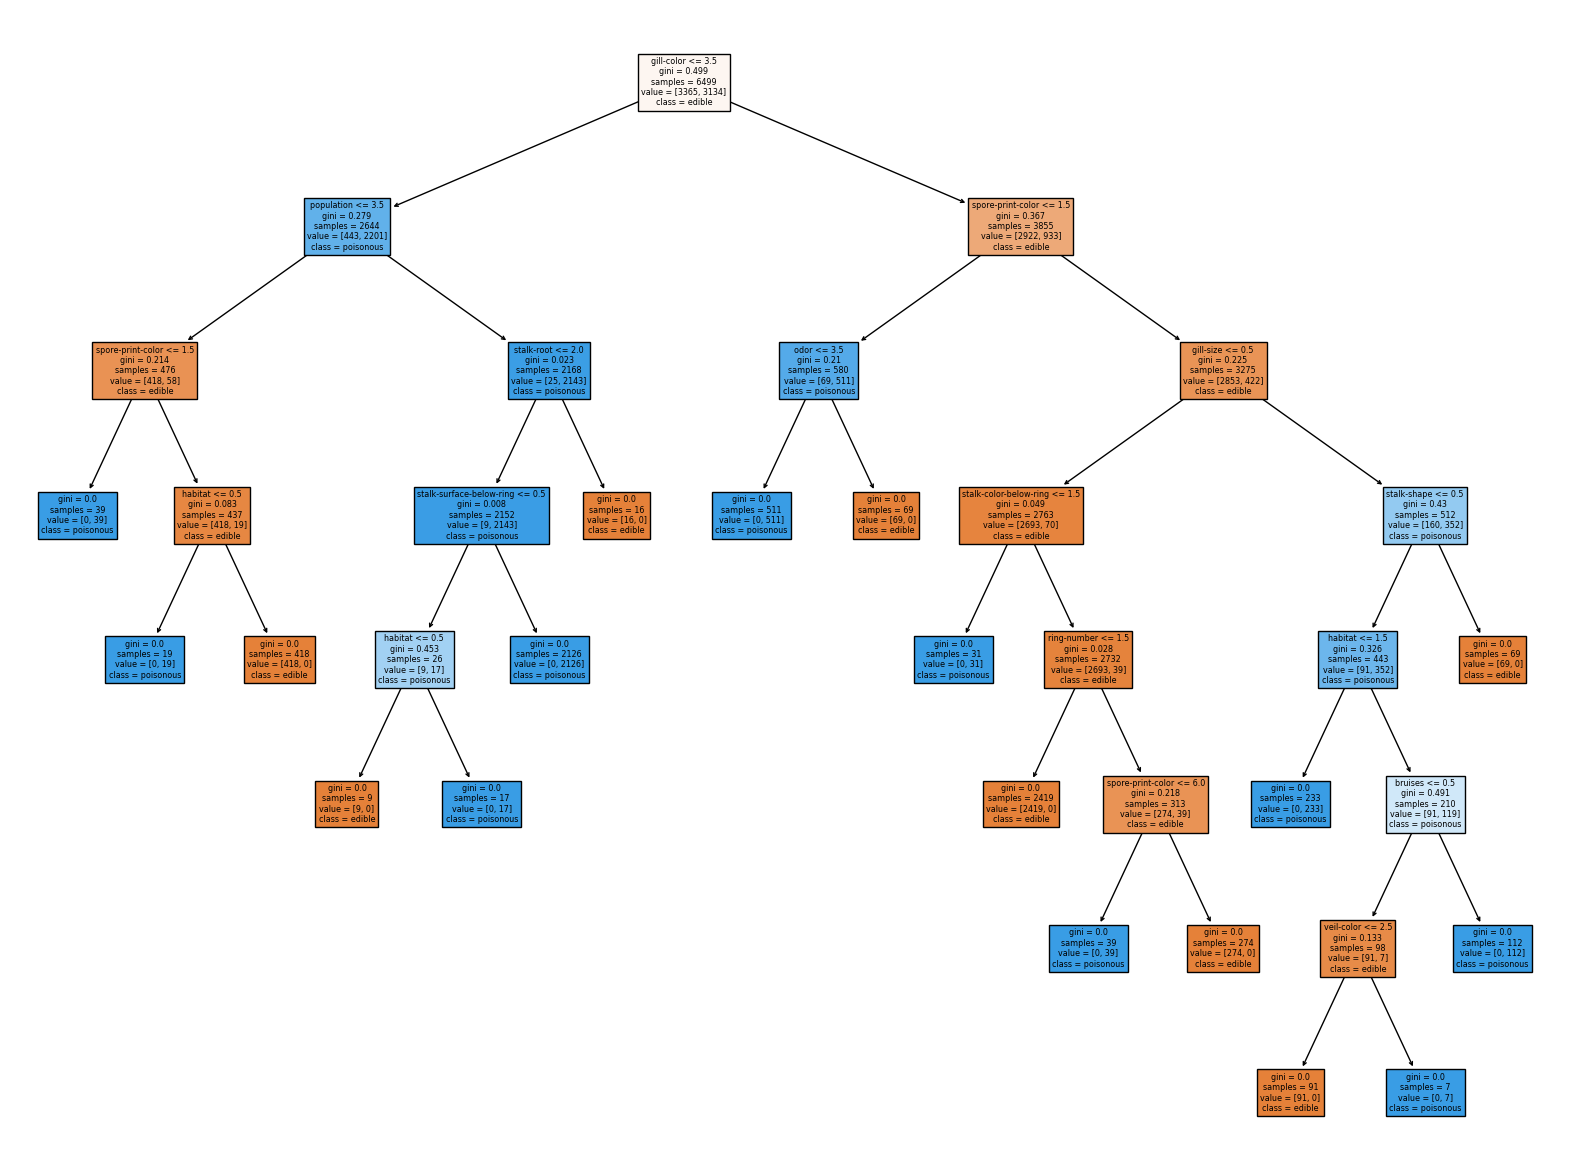

In [ ]:
file_path = "/content/drive/MyDrive/Computer_Vision/Mushrooms classification/mushrooms.csv"

data = pd.read_csv(file_path)

X = data.drop('class', axis=1)  # Características
y = data['class']               # Variable objetivo

label_encoders = {}
X_encoded = pd.DataFrame()

for column in X.columns:
    label_encoders[column] = LabelEncoder()
    X_encoded[column] = label_encoders[column].fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

plt.figure(figsize=(20,15))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=['edible', 'poisonous'])
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


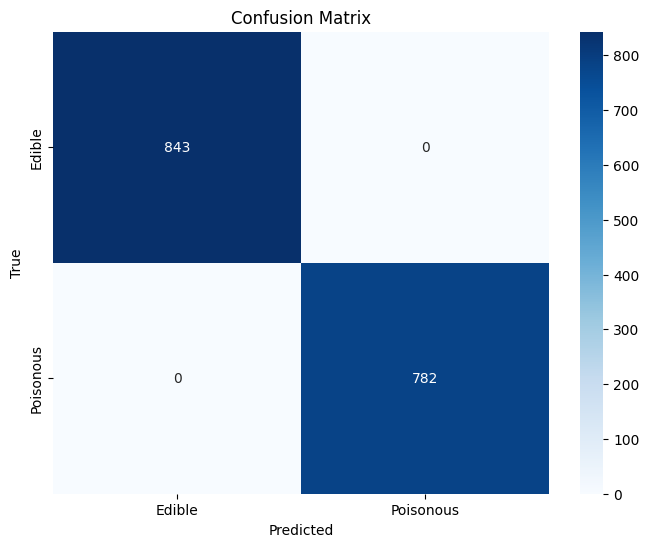

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_names = ['Edible', 'Poisonous']
class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Reporte de clasificación:\n")
print(class_report)

Reporte de clasificación:

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

